# Big Picture.

The wisconson Breast Cancer dataset uses several feature to justify if a cancer is Malignant or Benign. The context of this machine learning alogorithm is to investage which features in the dataset has higher contribution to detech if a cancer is malignant or Benign. 

In [1]:
%config IPCompleter.greedy=True # Auto completion

# Get the Data.

I picked this dataset because the context of the dataset is very interesting and I wanted to know the feature importance of the dataset wheather or not if they are very important to predict wheather a patient has Malignant or  Benign cancer.

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from math import sqrt

In [3]:
# URL of the dataset "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data"
# Importing the dataset and review the dataset
data = pd.read_csv('BreastCancer.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [4]:
# Size of the dataset
import os
getSize = os.path.getsize("BreastCancer.csv")
print("Size of the dataset: {0:.3} MB".format(getSize/1048576))

Size of the dataset: 0.119 MB


##### Dataset info
Entries: 596                               
Size: 0.119 MB or 122.2KB                              
Features: 33                               
The basic statistics I can learn right away from the dataset is that, the convavity_mean and the concave points_mean has a minimum value of            0.00000. That means that the are some zero values in the dataset which has to be taken care of.

# Discover and Visualization #

In [5]:
# Print out the list of all the feature names in the dataset
columns = data.columns    
print(columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
drop = ["id","Unnamed: 32"]
dataset = data.drop(drop, axis=1)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
dataset['diagnosis'] = data.diagnosis.map({'M':0, 'B':1})

In [32]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [7]:
#Columns after removing the irrelevant attributes
columns = dataset.columns    
print(columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [8]:
## There are a few columns we dont need for feature selection. 
## ID, diagnosis unnamed: 32, so we need to drop those columns and also sepearate the 
## class labels from the feature selections. Diagnosis is the class label in this dataset

#Preparing the dataset. Independent variable 
X = dataset.iloc[:, 1:31].values
df_X = pd.DataFrame(dataset)
c = df_X.columns[1:31]
df_X = pd.DataFrame(X, columns = c)
df_X.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Class label
y = dataset.iloc[:, 0].values
df_y = pd.DataFrame(dataset)
c = df_y.columns[:1]
df_y = pd.DataFrame(y, columns=c)
df_y.head()


,diagnosis
0,M
1,M
2,M
3,M
4,M


In [10]:
#correlation among the features
corr_matrix = df_X.corr(method = "pearson")
df_X.corr()
corr_matrix.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316


In [11]:
#columns of the attributes features X
columns = df_X.columns    
print(columns)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


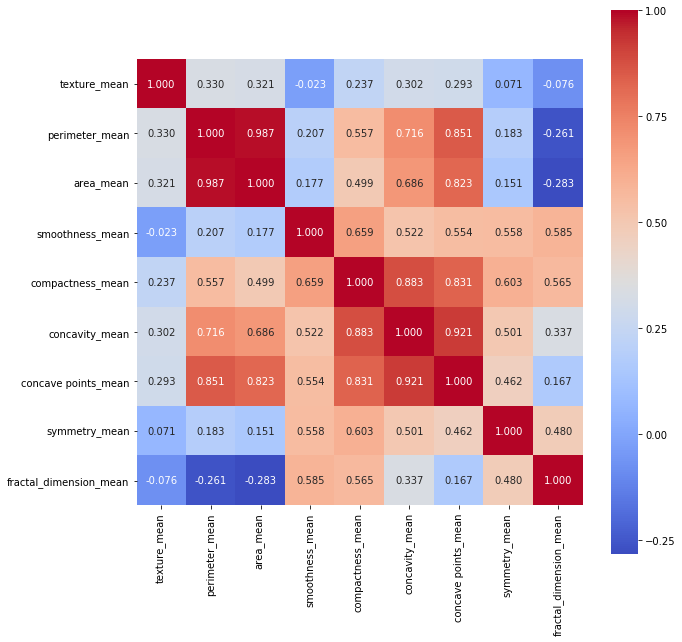

In [12]:
# Decided to use the means of the features as my feature selection
features_mean= list(df_X.columns[1:10])
corr = df_X[features_mean].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 

In [13]:
#Selecting the best correlation among the features
X = df_X.iloc[:, [0, 2, 3, 20]].values
df_X = pd.DataFrame(df_X)
c = df_X.columns[[0, 2, 3, 20]]
df_X = pd.DataFrame(X, columns=c)
df_X.head()


,radius_mean,perimeter_mean,area_mean,radius_worst
0,17.99,122.80,1001.0,25.38
1,20.57,132.90,1326.0,24.99
2,19.69,130.00,1203.0,23.57
3,11.42,77.58,386.1,14.91
4,20.29,135.10,1297.0,22.54


In [14]:
#Verifing the best correlation
corr_matrix= df_X.corr()
corr_matrix["radius_mean"].sort_values(ascending=False)

radius_mean       1.000000
perimeter_mean    0.997855
area_mean         0.987357
radius_worst      0.969539
Name: radius_mean, dtype: float64

In [15]:
#Handling categorical values. Transforming categorical values ( Class Label) into numeric values 
from sklearn.preprocessing import LabelEncoder
y_enc = LabelEncoder()
c = df_y.columns[:1]
y = pd.DataFrame(y_enc.fit_transform(y), columns=c)
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


##### Checking correlation among features selected

In [33]:
corr_matrix = dataset.corr()
corr_matrix["diagnosis"].sort_values(ascending = True)

concave points_worst      -0.793566
perimeter_worst           -0.782914
concave points_mean       -0.776614
radius_worst              -0.776454
perimeter_mean            -0.742636
area_worst                -0.733825
radius_mean               -0.730029
area_mean                 -0.708984
concavity_mean            -0.696360
concavity_worst           -0.659610
compactness_mean          -0.596534
compactness_worst         -0.590998
radius_se                 -0.567134
perimeter_se              -0.556141
area_se                   -0.548236
texture_worst             -0.456903
smoothness_worst          -0.421465
symmetry_worst            -0.416294
texture_mean              -0.415185
concave points_se         -0.408042
smoothness_mean           -0.358560
symmetry_mean             -0.330499
fractal_dimension_worst   -0.323872
compactness_se            -0.292999
concavity_se              -0.253730
fractal_dimension_se      -0.077972
symmetry_se                0.006522
texture_se                 0

In [16]:
y['diagnosis'].corr(df_X['area_mean'])

0.70898383658538866

In [17]:
y['diagnosis'].corr(df_X['radius_mean'])

0.73002851137545532

In [18]:
y['diagnosis'].corr(df_X['radius_worst'])

0.77645377859503828

In [19]:
y['diagnosis'].corr(df_X['perimeter_mean'])

0.7426355297258318

##### The above correlation are really good and correlates well with the class label 'diagnosis'

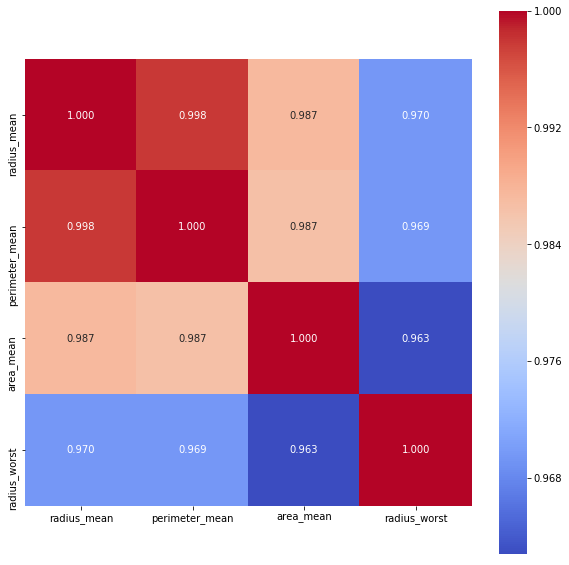

In [20]:
#Best Correlation
features_mean= list(df_X.columns[[0, 1, 2, 3]] )
corr_matrix = df_X[features_mean].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, cbar = True,  square = True, annot=True, fmt= '.3f',annot_kws={'size': 10},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 

# Prep the data 

In [21]:
#clean data -- Taking care of missing data --replacing zeros with the mean
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values= 0, strategy="mean", axis=0, verbose=0)
imputer = imputer.fit(X[:, 0:3])
(X[:,0:3]) = imputer.transform(X[:,0:3])

In [22]:
#Handling categorical values. Transforming categorical values ( Class Label) into numeric values 
from sklearn.preprocessing import LabelEncoder
y_enc = LabelEncoder()
c = df_y.columns[:1]
y = pd.DataFrame(y_enc.fit_transform(y), columns=c)
y.head()

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,diagnosis
0,1
1,1
2,1
3,1
4,1


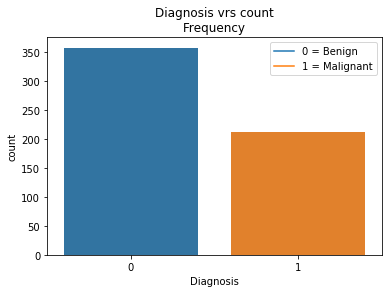

In [23]:
# Frequency of the diagnoses
sns.countplot(y["diagnosis"])
plt.plot(0, label ="0 = Benign")
plt.plot(1, label ="1 = Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.title("Diagnosis vrs count\nFrequency")
plt.legend()

##### scattered plots for the features selected

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001340ABBC198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001340C7BFE10>]], dtype=object)

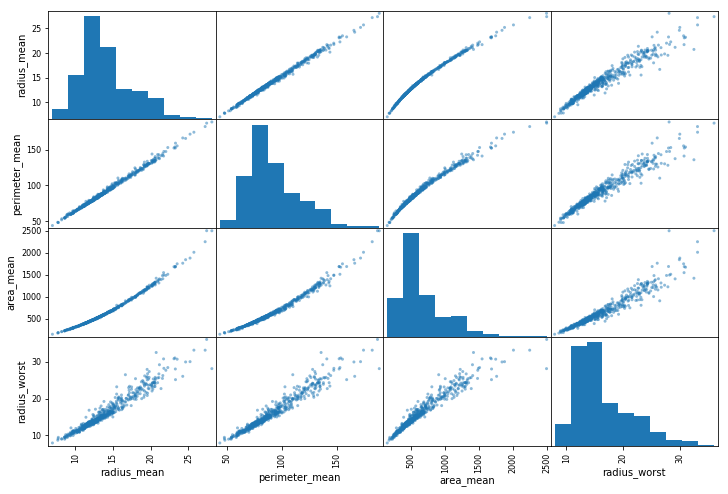

In [24]:
from pandas.plotting import scatter_matrix
scatt = ["radius_mean", "perimeter_mean", "area_mean", "radius_worst"]
scatter_matrix(df_X[scatt], figsize=(12, 8))

# Select a few linear ML classifiers, train them, and find multiple performance measures for each of the model

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.30, random_state = 0)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### shapes after spliting the dataset into train and test set

In [26]:
train_X.shape

(398, 4)

In [27]:
test_X.shape

(171, 4)

In [28]:
train_y.shape

(398, 1)

In [29]:
test_y.shape

(171, 1)

##### Decision Tree Classifier with Confusion_matrix, Precision and recall_score, F1-Score

In [30]:
#Decision Tree Classifier
# Fitting classifier to the Deccision Tree Training set
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [31]:
predict_dt_y = dt_classifier.predict(test_X)

In [32]:
#Prediction with DecisionTreeClassifier
print (predict_dt_y.tolist())


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]


In [33]:
#Actual prediction
arr = np.array(test_y)
print(arr.tolist())

[[1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [1], [1], [0], [0], [1], [0], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [1], [0], [1], [0], [0], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [1], [1], [0], [0], [1], [0], [1], [1], [1], [0], [0], [1], [0], [1], [1], [0], [0], [0], [0], [0], [1], [1], [1], [0], [1], [0], [0], [0], [1], [1], [0], [1], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [1], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0]]


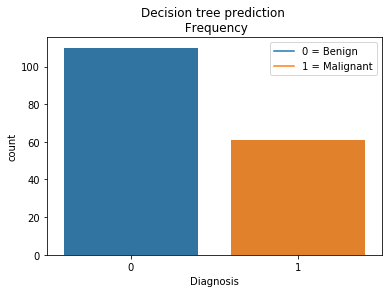

In [34]:
#Visualization of the Decision Tree Prediction
sns.countplot(predict_dt_y)
plt.plot(0, label ="0 = Benign")
plt.plot(1, label ="1 = Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.title("Decision tree prediction \n Frequency")
plt.legend()

In [35]:
# Making the Confusion Matrix for decision tree
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(test_y, predict_dt_y)

[[102   6]
 [  8  55]]


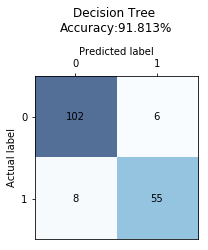

In [36]:
#Confusion matrix
from sklearn.metrics import accuracy_score
print(cm_dt)
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm_dt, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Decision Tree \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_dt_y)))
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(x=j, y=i,
            s=cm_dt[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [37]:
#Precision and recall, F1-score for Decision Tree
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Decision Tree: {0:.3%} ".format(precision_score(test_y, predict_dt_y)))
print ("Recall Decision Tree:    {0:.3%} ".format(recall_score(test_y, predict_dt_y)))
print("F1-Score Decision Tree:  {0:.3%} ".format(f1_score(test_y, predict_dt_y)))

Precision Decision Tree: 90.164% 
Recall Decision Tree:    87.302% 
F1-Score Decision Tree:  88.710% 


In [38]:
#Mean and root square error Decision Tree
from sklearn.metrics import mean_squared_error
print("Mean squared error Decision Tree: {0:.3%} ".format(mean_squared_error(test_y, predict_dt_y)))
rootMeanSquaredError_dt= sqrt(mean_squared_error(test_y, predict_dt_y))
print ("Root mean squared error Decision Tree: {0:.3%} ".format(rootMeanSquaredError_dt/10))

Mean squared error Decision Tree: 8.187% 
Root mean squared error Decision Tree: 2.861% 


##### ROC Curves Decision Tree Classifier

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_tree, tpr_tree, thresholds = roc_curve(test_y, predict_dt_y)

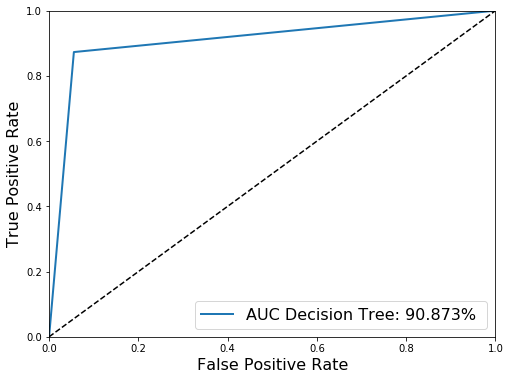

In [40]:
def plot_roc_curve(fpr_tree, tpr_tree, label=None):
    plt.plot(fpr_tree, tpr_tree, linewidth=2, label="AUC Decision Tree: {0:.3%} ".format(roc_auc_score(test_y, predict_dt_y)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_tree, tpr_tree)
plt.show()

In [41]:
#Area under the curve
from sklearn.metrics import roc_auc_score
print("Area under the ROC Decision Tree: {0:.3%} ".format(roc_auc_score(test_y, predict_dt_y)))

Area under the ROC Decision Tree: 90.873% 


##### Random Forest Tree Classifier with Confusion_matrix, Precision and recall_score, F1-Score

In [42]:
#Random Forest Classifier
#Fitting classifier to the Random Forest tree Training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=32)
rf_classifier.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=32, verbose=0, warm_start=False)

In [43]:
#Predicting the test result
predict_rf_y = rf_classifier.predict(test_X)

In [44]:
#Prediction with RandomForestClassifier
print(predict_rf_y.tolist())

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]


In [45]:
#Actual prediction
arr = np.array(test_y)
print(arr.tolist())

[[1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [1], [1], [0], [0], [1], [0], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [1], [0], [1], [0], [0], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [1], [1], [0], [0], [1], [0], [1], [1], [1], [0], [0], [1], [0], [1], [1], [0], [0], [0], [0], [0], [1], [1], [1], [0], [1], [0], [0], [0], [1], [1], [0], [1], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [1], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0]]


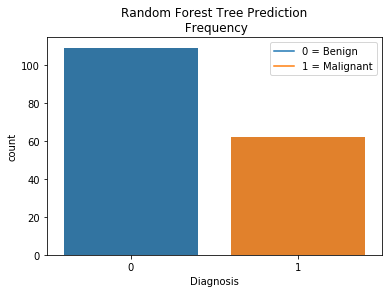

In [46]:
#Visualization of the Random Forest Tree Prediction
sns.countplot(predict_rf_y)
plt.plot(0, label ="0 = Benign")
plt.plot(1, label ="1 = Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.title("Random Forest Tree Prediction\n Frequency")
plt.legend()

In [47]:
# Making the Confusion Matrix for RandomForestClassifier
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(test_y, predict_rf_y)

[[103   5]
 [  6  57]]


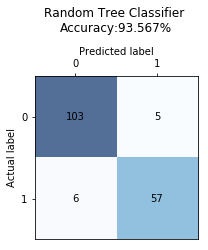

In [48]:
#Confusion matrix
from sklearn.metrics import accuracy_score
print(cm_rf)
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm_rf, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Random Tree Classifier \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_rf_y)))
for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(x=j, y=i,
            s=cm_rf[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [49]:
#Precision and recall, F1-score for RandomForestClassifier Tree
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Random Forest Tree: {0:.3%} ".format(precision_score(test_y, predict_rf_y)))
print ("Recall Random Forest Tree:    {0:.3%} ".format(recall_score(test_y, predict_rf_y)))
print("F1-Score Random Forest Tree:  {0:.3%} ".format(f1_score(test_y, predict_rf_y)))

Precision Random Forest Tree: 91.935% 
Recall Random Forest Tree:    90.476% 
F1-Score Random Forest Tree:  91.200% 


In [50]:
#Mean and root square error Random Forest
from sklearn.metrics import mean_squared_error
print("Mean squared error Random Forest: {0:.3%} ".format(mean_squared_error(test_y, predict_rf_y)))
rootMeanSquaredError_rf  = sqrt(mean_squared_error(test_y, predict_rf_y))
print ("Root mean squared error Random Forest: {0:.3%} ".format(rootMeanSquaredError_rf/10))

Mean squared error Random Forest: 6.433% 
Root mean squared error Random Forest: 2.536% 


##### ROC CURVES Random Forest Classifier

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_forest,tpr_forest, thresholds = roc_curve(test_y, predict_rf_y)

In [34]:
def plot_roc_curve(fpr_forest, tpr_forest, label=None):
    plt.plot(fpr_forest, tpr_forest, linewidth=2, label="AUC Random Forest: {0:.3%} ".format(roc_auc_score(test_y, predict_rf_y)))
    plt.legend(loc="lower right", fontsize=16)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

NameError: name 'fpr_forest' is not defined

In [53]:
#Area under the curve Random Forest Classifier
from sklearn.metrics import roc_auc_score
print("Area under the ROC Random Forest: {0:.3%} ".format(roc_auc_score(test_y, predict_rf_y)))

Area under the ROC Random Forest: 92.923% 



##### Scholastic Gradient Descent with Confusion_matrix, Precision and recall_score, F1-Score

In [54]:
#Scolastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_classifer = SGDClassifier(random_state=32, penalty='l2')
sgd_classifer.fit(train_X, train_y)

C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\Eugene\AppData\Local\conda\conda\envs\mlbook\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=32, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [55]:
#Make a prediction
predict_sgd_y = sgd_classifer.predict(test_X)

In [56]:
#Prediction with Scolastic Gradient Descent
print(predict_sgd_y.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]


In [57]:
#Actual prediction
arr = np.array(test_y)
print(arr.tolist())

[[1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [1], [1], [0], [0], [1], [0], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [0], [1], [1], [0], [1], [0], [0], [1], [0], [0], [0], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [1], [1], [0], [0], [1], [0], [1], [1], [1], [0], [0], [1], [0], [1], [1], [0], [0], [0], [0], [0], [1], [1], [1], [0], [1], [0], [0], [0], [1], [1], [0], [1], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [1], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [0], [1], [1], [0], [0], [1], [0], [1], [1], [1], [0], [0], [0]]


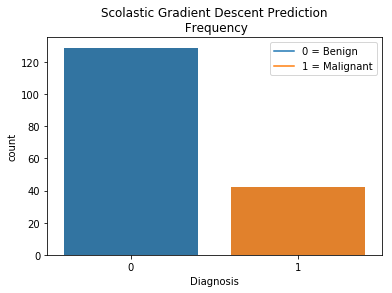

In [58]:
#Visualization of the Scolastic Gradient Descent Prediction 
sns.countplot(predict_sgd_y)
plt.plot(0, label ="0 = Benign")
plt.plot(1, label ="1 = Malignant")
plt.xlabel("Diagnosis")
plt.ylabel("count")
plt.title("Scolastic Gradient Descent Prediction\n Frequency")
plt.legend()

In [59]:
# Making the Confusion Matrix for Scolastic Gradient Descent
from sklearn.metrics import confusion_matrix
cm_sdg = confusion_matrix(test_y, predict_sgd_y)

[[106   2]
 [ 23  40]]


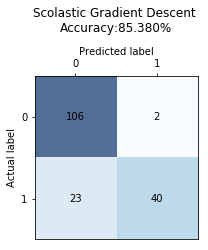

In [60]:
#Confusion matrix
from sklearn.metrics import accuracy_score
print(cm_sdg)
fig, ax = plt.subplots(figsize=(3,3))
ax.matshow(cm_sdg, cmap=plt.cm.Blues, alpha=0.7)
ax.set_title('Scolastic Gradient Descent \nAccuracy:{0:.3%}\n\n'.format(accuracy_score(test_y, predict_sgd_y)))
for i in range(cm_sdg.shape[0]):
    for j in range(cm_sdg.shape[1]):
        ax.text(x=j, y=i,
            s=cm_sdg[i, j],
            va='center', ha='center')
ax.set_ylabel('Actual label')
ax.set_xlabel('Predicted label')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.show()

In [61]:
#Precision and recall, F1-score for Scolastic Gradient Descent
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Scolastic Gradient Descent: {0:.3%} ".format(precision_score(test_y, predict_sgd_y)))
print ("Recall Scolastic Gradient Descent:    {0:.3%} ".format(recall_score(test_y, predict_sgd_y)))
print("F1-Score Scolastic Gradient Descent:  {0:.3%} ".format(f1_score(test_y, predict_sgd_y)))

Precision Scolastic Gradient Descent: 95.238% 
Recall Scolastic Gradient Descent:    63.492% 
F1-Score Scolastic Gradient Descent:  76.190% 


In [62]:
#Mean square error Scolatic Gradient Descent
from sklearn.metrics import mean_squared_error
print("Mean squared error Random Forest: {0:.3%} ".format(mean_squared_error(test_y, predict_sgd_y)))
rootMeanSquaredError_sdg  = sqrt(mean_squared_error(test_y, predict_sgd_y))
print ("Root mean squared error SGD :  {0:.3%} ".format(rootMeanSquaredError_sdg/10))

Mean squared error Random Forest: 14.620% 
Root mean squared error SGD :  3.824% 


##### ROC Curves Scholastic Gradient Descent

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr_sgd,tpr_sgd, thresholds = roc_curve(test_y, predict_sgd_y)

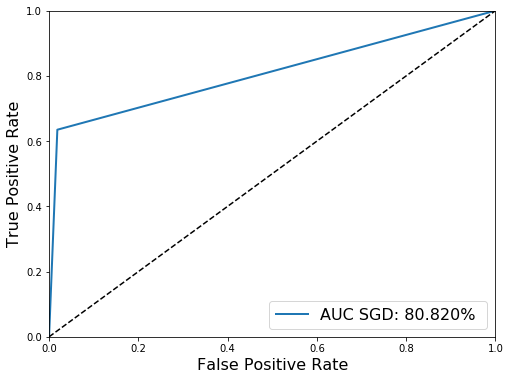

In [64]:
def plot_roc_curve(fpr_sgd, tpr_sgd, label=None):
    plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="AUC SGD: {0:.3%} ".format(roc_auc_score(test_y, predict_sgd_y)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc="lower right", fontsize=16)
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

In [65]:
#Area under the curve Scholastic Gradient Descent
from sklearn.metrics import roc_auc_score
print("Area under the ROC Scholatic Gradient Descent: {0:.3%} ".format(roc_auc_score(test_y, predict_sgd_y)))

Area under the ROC Scholatic Gradient Descent: 80.820% 


##### Plot all three models ROC curve together


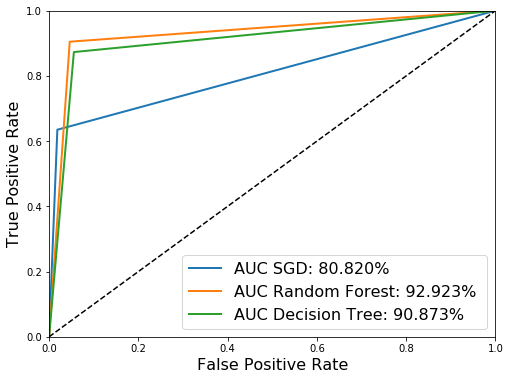

In [66]:
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(8,6))
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label="AUC SGD: {0:.3%} ".format(roc_auc_score(test_y, predict_sgd_y)))
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="AUC Random Forest: {0:.3%} ".format(roc_auc_score(test_y, predict_rf_y)))
plt.plot(fpr_tree, tpr_tree, linewidth=2, label="AUC Decision Tree: {0:.3%} ".format(roc_auc_score(test_y, predict_dt_y)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In the above graph we can clearly see how best the random forest classifier fit our data very well. Decision tree was a little close but the random forest was much better.

##### Assessment of models
In my models the Random Forest Classifier yield the best performance for the measure of my dataset with the top 4 predictors  'area_mean', 'radius_mean', 'perimeter_mean', 'radius_worst'.This classifier gives a prediction of Precision Random Forest Tree: 91.935%, Recall Random Forest Tree:  90.476%, F1-Score Random Forest Tree:  91.200%, Area under the ROC Random Forest: 92.923% which is better as compared to the Decision Tree Classifier and Scholastic Gradient Descent.

I think my assessment was a good result because this dataset had several features and shrinking the features into just 4 features, produced great results which means that my overrall assement was really good. 

# Integrate a regularization

##### Using Lasso regularization on Random Forest (best model)

In [67]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [68]:
lasso_predict =lasso_reg.predict(test_X)
lasso_predict

array([ 0.41054976,  0.24406132,  0.31230515,  0.3753703 ,  0.181782  ,
        0.07717412,  0.14918616,  0.08731703, -0.37319442, -0.05758539,
        0.51138617,  0.41067501, -0.17887132,  0.5646746 ,  0.45806963,
        0.61711268, -0.14167388,  0.92080356,  0.80094062,  1.0170402 ,
        0.32335898,  0.66855383,  0.32498378,  0.13252285,  0.91974917,
        0.15185827,  0.01126241,  0.43408861,  0.27453368,  0.92151707,
        0.18388201,  0.903536  ,  0.30502612,  0.6474484 , -0.1397354 ,
        0.37435846,  0.27877247,  0.78652352,  0.41434866,  0.53017741,
        0.44520165, -0.21288106,  0.57305154, -0.06424893,  0.34539383,
        0.95400412, -0.27898783,  0.33813284,  0.09478491,  0.51975549,
        0.93721967,  0.52527881,  0.79436066,  0.09104567,  0.19848265,
        0.07209098,  0.03394374,  0.13972834,  0.13789309,  1.17360319,
        0.41772137,  0.6067901 ,  0.03647222,  0.21533035,  0.8293534 ,
        0.15069077,  1.28147772,  0.81431446,  0.90526619, -0.15

In [69]:
lasso_predict =lasso_reg.predict(test_X)
lasso_predict

array([ 0.41054976,  0.24406132,  0.31230515,  0.3753703 ,  0.181782  ,
        0.07717412,  0.14918616,  0.08731703, -0.37319442, -0.05758539,
        0.51138617,  0.41067501, -0.17887132,  0.5646746 ,  0.45806963,
        0.61711268, -0.14167388,  0.92080356,  0.80094062,  1.0170402 ,
        0.32335898,  0.66855383,  0.32498378,  0.13252285,  0.91974917,
        0.15185827,  0.01126241,  0.43408861,  0.27453368,  0.92151707,
        0.18388201,  0.903536  ,  0.30502612,  0.6474484 , -0.1397354 ,
        0.37435846,  0.27877247,  0.78652352,  0.41434866,  0.53017741,
        0.44520165, -0.21288106,  0.57305154, -0.06424893,  0.34539383,
        0.95400412, -0.27898783,  0.33813284,  0.09478491,  0.51975549,
        0.93721967,  0.52527881,  0.79436066,  0.09104567,  0.19848265,
        0.07209098,  0.03394374,  0.13972834,  0.13789309,  1.17360319,
        0.41772137,  0.6067901 ,  0.03647222,  0.21533035,  0.8293534 ,
        0.15069077,  1.28147772,  0.81431446,  0.90526619, -0.15

In [70]:
#Lasso MSE and RMSE for Random Forest
from sklearn.metrics import mean_squared_error
print("Lasso Mean squared error Random Forest: {0:.3%} ".format(mean_squared_error(test_y, lasso_predict)))
rootMeanSquaredError_lasso_rf  = sqrt(mean_squared_error(test_y, lasso_predict))
print ("Lasso Root mean squared error Random Forest:  {0:.3%} ".format(rootMeanSquaredError_lasso_rf/10))

Lasso Mean squared error Random Forest: 8.598% 
Lasso Root mean squared error Random Forest:  2.932% 


##### Using Ridge regularization on Random Forest (best model)

In [71]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(train_X, train_y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [72]:
ridge_predict = ridge_reg.predict(test_X)
print(ridge_predict)

[[ 0.57584654]
 [ 0.12589079]
 [ 0.16013396]
 [ 0.28402553]
 [-0.00172763]
 [ 0.06737158]
 [ 0.14742197]
 [ 0.01071718]
 [-0.32721119]
 [-0.04096689]
 [ 0.61559084]
 [ 0.32940642]
 [-0.18262314]
 [ 0.35555291]
 [ 0.44844343]
 [ 0.74955178]
 [ 0.03227562]
 [ 0.81939541]
 [ 0.61965059]
 [ 1.02981034]
 [ 0.6370558 ]
 [ 0.77153934]
 [ 0.2945645 ]
 [ 0.10025801]
 [ 0.68974118]
 [ 0.14276648]
 [-0.02793914]
 [ 0.62808112]
 [ 0.16931927]
 [ 1.00867063]
 [ 0.04812351]
 [ 0.72954578]
 [ 0.34332319]
 [ 0.70483497]
 [-0.17203151]
 [ 0.58745835]
 [ 0.20679525]
 [ 0.65170811]
 [ 0.25906215]
 [ 0.57377879]
 [ 0.32059963]
 [-0.14859354]
 [ 0.49121621]
 [-0.09683664]
 [ 0.42728256]
 [ 0.83225828]
 [-0.29132824]
 [ 0.21954099]
 [ 0.01619647]
 [ 0.67138844]
 [ 1.12006376]
 [ 0.64449783]
 [ 0.75099285]
 [ 0.04443283]
 [ 0.16308089]
 [ 0.02104169]
 [-0.04557744]
 [ 0.02727895]
 [ 0.04743922]
 [ 1.4197606 ]
 [ 0.52274045]
 [ 0.60898508]
 [ 0.01051608]
 [ 0.12768243]
 [ 1.04314249]
 [ 0.11820417]
 [ 1.60624

In [73]:
#Ridge MSE and RMSE error for Random Forest
from sklearn.metrics import mean_squared_error
print("Ridge Mean squared error Random Forest: {0:.3%}".format(mean_squared_error(test_y, ridge_predict)))
rootMeanSquaredError_ridge_rf  = sqrt(mean_squared_error(test_y, ridge_predict))
print ("Ridge Root mean squared error Random Forest:  {0:.3%}".format(rootMeanSquaredError_ridge_rf/10))

Ridge Mean squared error Random Forest: 7.985%
Ridge Root mean squared error Random Forest:  2.826%


##### Using Elastic regularization on Random Forest (best model)

In [74]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(train_X, train_y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [75]:
elastic_net_predict = elastic_net.predict(test_X)
elastic_net_predict

array([ 0.44399639,  0.23381199,  0.29256889,  0.38065763,  0.14969112,
        0.0692031 ,  0.12262708,  0.07397114, -0.38711006, -0.08136007,
        0.50985343,  0.4018403 , -0.20569074,  0.53785618,  0.45694823,
        0.64965332, -0.15974706,  0.91100924,  0.74161094,  1.01933068,
        0.40929328,  0.67027531,  0.32173341,  0.13332645,  0.83911548,
        0.16096971,  0.01101581,  0.42123605,  0.26882271,  0.98632723,
        0.16566434,  0.90671756,  0.30485076,  0.67416312, -0.1564346 ,
        0.44679464,  0.28617803,  0.78102641,  0.40738019,  0.56535444,
        0.44856028, -0.22882354,  0.5991806 , -0.07850553,  0.35925389,
        0.9186939 , -0.30750373,  0.32989081,  0.07672583,  0.54475193,
        0.8919782 ,  0.50766871,  0.81423963,  0.08389667,  0.18689581,
        0.0617768 ,  0.01564625,  0.13239664,  0.12973477,  1.20066081,
        0.43997845,  0.64113539,  0.02272636,  0.20210697,  0.85153804,
        0.15199499,  1.30374945,  0.88246177,  0.87130009, -0.16

In [76]:
#Elastic MSE and RMSE error for Random Forest
from sklearn.metrics import mean_squared_error
print("Elastic Mean squared error Random Forest: {0:.3%}".format(mean_squared_error(test_y, elastic_net_predict)))
rootMeanSquaredError_elastic_rf  = sqrt(mean_squared_error(test_y, elastic_net_predict))
print ("Elastic Root mean squared error Random Forest: {0:.3%}".format(rootMeanSquaredError_elastic_rf/10))

Elastic Mean squared error Random Forest: 8.235%
Elastic Root mean squared error Random Forest: 2.870%


# Present your solution

I think based on this model, I will recommed we try different machine learning models for classifications of tune its parameteres. Looking at the predictions, we have, it can be seen that when parameters were not tuned enough. Overall, Random forest did a great job and tunning its parameters can most precisely give more better classification results.

I actually learned a lot from the project. I learned that based on the classifies, the Random Forest Classifier worked best for my model and also the closest next best classifier was the decision tree classifiers with also worked great for my model. The worst model was scholastic gradient descent which did a ver bad job classifying. Overrall, the Random forest is the best model for clasification. Also, I learned that using the right features for your model is very important because if you have features that have poor correlation in you dataset can produce a very bad result.

# Plan for the future of your system

No! I dont need to get more data. The dataset provided was enough to predict whether a cancer is Malignant or Benign. However, some of the features were not important and had bad correlation among them. So taking them out was the best way to have a better prediction. Based on those 4 features, my model was able to produce great results.

I think the model will work great for the future. The Random forest classifier will be able to predict well based on any dataset you fit in. Also, in the future, I will try different models and tweek this model furthur to see if I can get a more better results or predictions.
I tried several regularization techniques on my model in order to get a better result. I was hoping these techniques will have less error in my classification, but I realized that, there regularization techniques did not help either, but instead, rather increases my error rate. The ridge was a little close, but was just 1% more my random forest model. These regularizations was based on the RMSE and MSE score. 

I am very satisfy with the system, because the Random Forest Classifier was able to predict the diagnose of cancer based on the 4 features.

Below is the prediction:                                                         
Precision Random Forest Tree: 91.935%                                                  
Recall Random Forest Tree:    90.476%                                           
F1-Score Random Forest Tree:  91.200%  
Area under the ROC Random Forest: 92.923%  
Mean squared error Random Forest: 6.433%                                                
Root mean squared error Random Forest: 2.536%                                       
I think what needs to be improved with the models is tweeking the parameters of the classifier more so we can get a more better results. Also, in the future, I can tune the parameter more to verify if I can use any of the regularization techniques to help my model.